# Resnet 50
- Dataset: PolyU Contactless 2D to Contact-based 2D Fingerprint Images Database. http://www4.comp.polyu.edu.hk/~csajaykr/fingerprint.htm
- Keras: 2.8
- TensorFlow: 2.8
- Python: 3.9

Sandra Aguilar

# Importing Libraries

In [2]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Data understanding /Data preparation
Dataset

In [3]:
import pathlib
data_dir = r'C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\first_session'
data_dir = pathlib.Path(data_dir)

In [37]:
class_count = len(list(data_dir.glob('*/')))
print('Number of classes:' + str(class_count))

Number of classes:336


Showing one image of the dataset

C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\first_session\p1\p1.bmp


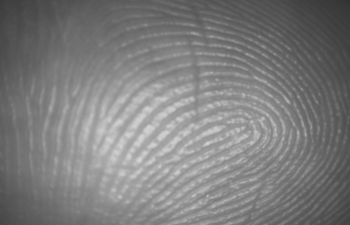

In [5]:
person1 = list(data_dir.glob('p1/*'))
print(person1[0])
PIL.Image.open(str(person1[0]))

## Splitting the dataset


### Training Dataset
80 % for training, 20% for validation

In [6]:
img_height,img_width=350,225
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2016 files belonging to 336 classes.
Using 1613 files for training.


### Validation dataset

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2016 files belonging to 336 classes.
Using 403 files for validation.


In [38]:
class_names = train_ds.class_names
print('Number of classes found: ')
print(class_names)

Number of classes found: 
['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p135', 'p136', 'p137', 'p138', 'p139', 'p14', 'p140', 'p141', 'p142', 'p143', 'p144', 'p145', 'p146', 'p147', 'p148', 'p149', 'p15', 'p150', 'p151', 'p152', 'p153', 'p154', 'p155', 'p156', 'p157', 'p158', 'p159', 'p16', 'p160', 'p161', 'p162', 'p163', 'p164', 'p165', 'p166', 'p167', 'p168', 'p169', 'p17', 'p170', 'p171', 'p172', 'p173', 'p174', 'p175', 'p176', 'p177', 'p178', 'p179', 'p18', 'p180', 'p181', 'p182', 'p183', 'p184', 'p185', 'p186', 'p187', 'p188', 'p189', 'p19', 'p190', 'p191', 'p192', 'p193', 'p194', 'p195', 'p196', 'p197', 'p198', 'p199', 'p2', 'p20', 'p200', 'p201', 'p202', 'p203', 'p204', 'p205', 'p206', 'p207', 'p208', 'p209', 'p21

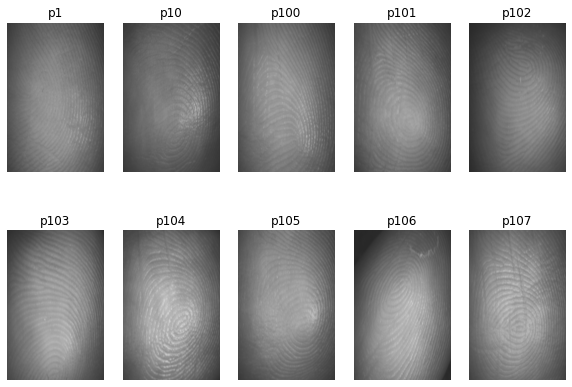

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
for images, labels in train_ds.take(10):
  for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

# Training The Model


In [30]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='avg',
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten()) #this converts to 1D feature vectors
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(class_count, activation='softmax'))


In [31]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 336)              172368    
 pper)                                                           
                                                                 
Total params: 24,809,168
Trainable params: 1,221,456
Non-trainable params: 23,587,712
__________________________________

In [32]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
import time
# #tensorboard
# from tensorflow.python.keras.callbacks import TensorBoard
# tensorboard=TensorBoard(log_dir='logs/{}'.format(time.time()))

epochs=10
start = time.time()
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,

)
# callbacks=[tensorboard]
end = time.time()
print(end - start)

Epoch 1/10
51/51 [==============================] - 134s 3s/step - loss: 5.7729 - accuracy: 0.0211 - val_loss: 5.4839 - val_accuracy: 0.0323
Epoch 2/10
51/51 [==============================] - 126s 2s/step - loss: 4.7603 - accuracy: 0.1265 - val_loss: 4.5210 - val_accuracy: 0.1290
Epoch 3/10
51/51 [==============================] - 128s 3s/step - loss: 3.3966 - accuracy: 0.3788 - val_loss: 3.3041 - val_accuracy: 0.3275
Epoch 4/10
51/51 [==============================] - 118s 2s/step - loss: 2.3240 - accuracy: 0.5735 - val_loss: 2.4558 - val_accuracy: 0.5161
Epoch 5/10
51/51 [==============================] - 127s 2s/step - loss: 1.5626 - accuracy: 0.7427 - val_loss: 1.7899 - val_accuracy: 0.6526
Epoch 6/10
51/51 [==============================] - 131s 3s/step - loss: 1.0858 - accuracy: 0.8357 - val_loss: 1.4316 - val_accuracy: 0.7122
Epoch 7/10
51/51 [==============================] - 119s 2s/step - loss: 0.7573 - accuracy: 0.8909 - val_loss: 1.1554 - val_accuracy: 0.7519
Epoch 8/10
51

# Evaluating The Model

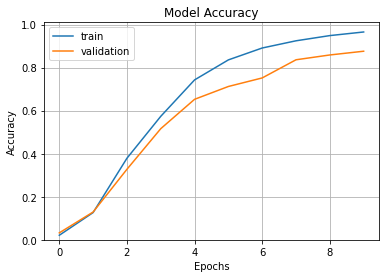

In [34]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1.01)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

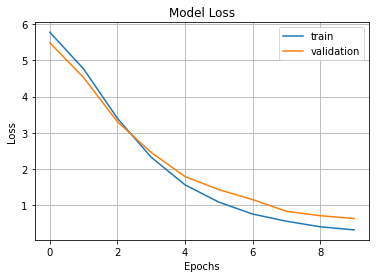

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Saving Model

In [70]:
tf.keras.models.save_model(
    resnet_model,
    "resnet50_contactless.model",
    overwrite=True,
    include_optimizer=True
)

INFO:tensorflow:Assets written to: resnet50_contactless.model\assets


INFO:tensorflow:Assets written to: resnet50_contactless.model\assets


# Making Predictions
I was taken one image from dataset second_session for testing

In [78]:
import cv2
image=cv2.imread(r'C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\second_session\p13\p5.bmp')
image_resized= cv2.resize(image, (img_width,img_height))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
pred=resnet_model.predict(image)
print(pred)

(1, 350, 225, 3)
[[7.27155737e-07 2.46132402e-07 8.42529171e-14 1.94627981e-04
  1.91683739e-07 1.49746986e-11 1.07985496e-11 1.06173466e-05
  1.36348135e-07 1.65410630e-10 2.84591434e-10 4.79051087e-05
  1.77415540e-08 7.77935156e-08 1.49206984e-11 1.39740916e-06
  1.85890917e-06 1.16110255e-09 2.77390444e-09 1.36326512e-17
  7.46355392e-03 1.17829686e-05 2.48855685e-07 2.51794874e-09
  1.22977519e-06 1.21971502e-10 2.13445528e-08 1.14114871e-14
  4.16613553e-08 7.94042998e-10 8.11050825e-07 4.56932103e-10
  5.41405587e-10 2.60467061e-08 6.36544108e-01 8.58277076e-08
  3.13278349e-07 1.39763743e-13 3.94809877e-06 1.66272372e-07
  4.71330139e-08 2.44604129e-11 1.58433377e-05 2.33716501e-11
  8.91228567e-08 3.34396958e-04 1.49031376e-09 3.06322181e-04
  4.36352536e-08 4.43414574e-05 3.73200101e-06 6.15111639e-06
  4.55633909e-07 3.61673038e-08 1.33528957e-07 2.56477483e-03
  1.01151410e-04 3.11988726e-04 7.65500441e-02 2.71018362e-04
  4.96514303e-06 1.98494760e-07 3.92411970e-08 4.3824

In [79]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is p13


In [71]:
model2 = tf.keras.models.load_model("resnet50_contactless.model")

In [80]:
pred=model2.predict(image)
print(pred)

[[7.27155737e-07 2.46132402e-07 8.42529171e-14 1.94627981e-04
  1.91683739e-07 1.49746986e-11 1.07985496e-11 1.06173466e-05
  1.36348135e-07 1.65410630e-10 2.84591434e-10 4.79051087e-05
  1.77415540e-08 7.77935156e-08 1.49206984e-11 1.39740916e-06
  1.85890917e-06 1.16110255e-09 2.77390444e-09 1.36326512e-17
  7.46355392e-03 1.17829686e-05 2.48855685e-07 2.51794874e-09
  1.22977519e-06 1.21971502e-10 2.13445528e-08 1.14114871e-14
  4.16613553e-08 7.94042998e-10 8.11050825e-07 4.56932103e-10
  5.41405587e-10 2.60467061e-08 6.36544108e-01 8.58277076e-08
  3.13278349e-07 1.39763743e-13 3.94809877e-06 1.66272372e-07
  4.71330139e-08 2.44604129e-11 1.58433377e-05 2.33716501e-11
  8.91228567e-08 3.34396958e-04 1.49031376e-09 3.06322181e-04
  4.36352536e-08 4.43414574e-05 3.73200101e-06 6.15111639e-06
  4.55633909e-07 3.61673038e-08 1.33528957e-07 2.56477483e-03
  1.01151410e-04 3.11988726e-04 7.65500441e-02 2.71018362e-04
  4.96514303e-06 1.98494760e-07 3.92411970e-08 4.38248771e-10
  3.1617

In [81]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is p13
